In [18]:
#Uvoz python biblioteka
#uvoz biblioteka za rad sa podacima i linearnu algebru
import pandas as pd
import numpy as np

#uvoz biblioteka za vizuelizaciju
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import plot_decision_regions

#uvoz biblioteke za upozorenja
import warnings

#uvoz biblioteka za pripremu podataka
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer

#uvoz biblioteka za testiranje modela
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#uvoz algoritmima za obučavanje modela
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


In [19]:
#Učitavanje dataseta pomoću pandas biblioteke
#prikaz osnovnih podataka o datasetu
dataset = pd.read_csv('diabetes.csv') 
display(dataset.info(),dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#Sve nemoguce nule menjamo sa 'NaN'
#kreiramo kopiju originalnog dataseta zbog prikaza realnih podataka i pravljenja izmena
data_copy = dataset.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(data_copy.isnull().sum()) #Prikazujemo broj NaN u datasetu(kopiji)
display(data_copy.head())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
#Pravimo izmene tako što popunjavamo vrednost NaN za Glucose sa
#slučajnim brojevima između srednje vrednosti plus minus standardna devijacija

for data in data_copy:
    mean = data_copy["Glucose"].mean()
    std = data_copy["Glucose"].std()
    is_null = data_copy["Glucose"].isnull().sum()
    rand = np.random.randint(mean-std,mean+std,size=is_null)
    gluc = data_copy["Glucose"].copy()
    gluc[np.isnan(gluc)] = rand
    data_copy["Glucose"] = gluc
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [22]:
#isti postupak ponavljamo i za ostale kolone
#Pravimo izmene tako što popunjavamo vrednost NaN za BloodPressure sa
#slučajnim brojevima između srednje vrednosti plus minus standardna devijacija

for data in data_copy:
    mean = data_copy["BloodPressure"].mean()
    std = data_copy["BloodPressure"].std()
    is_null = data_copy["BloodPressure"].isnull().sum()
    rand = np.random.randint(mean-std,mean+std,size=is_null)
    bp = data_copy["BloodPressure"].copy()
    bp[np.isnan(bp)] = rand
    data_copy["BloodPressure"] = bp
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
#Pravimo izmene tako što popunjavamo vrednost NaN za SkinThickness sa
#slučajnim brojevima između srednje vrednosti plus minus standardna devijacija

for data in data_copy:
    mean = data_copy["SkinThickness"].mean()
    std = data_copy["SkinThickness"].std()
    is_null = data_copy["SkinThickness"].isnull().sum()
    rand = np.random.randint(mean-std,mean+std,size=is_null)
    st = data_copy["SkinThickness"].copy()
    st[np.isnan(st)] = rand
    data_copy["SkinThickness"] = st
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [24]:
#Pravimo izmene tako što popunjavamo vrednost NaN za Insulin sa
#slučajnim brojevima između srednje vrednosti plus minus standardna devijacija

for data in data_copy:
    mean = data_copy["Insulin"].mean()
    std = data_copy["Insulin"].std()
    is_null = data_copy["Insulin"].isnull().sum()
    rand = np.random.randint(mean-std,mean+std,size=is_null)
    ins = data_copy["Insulin"].copy()
    ins[np.isnan(ins)] = rand
    data_copy["Insulin"] = ins
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [25]:
#Pravimo izmene tako što popunjavamo vrednost NaN za BMI sa
#slučajnim brojevima između srednje vrednosti plus minus standardna devijacija

for data in data_copy:
    mean = data_copy["BMI"].mean()
    std = data_copy["BMI"].std()
    is_null = data_copy["BMI"].isnull().sum()
    rand = np.random.randint(mean-std,mean+std,size=is_null)
    bmi = data_copy["BMI"].copy()
    bmi[np.isnan(bmi)] = rand
    data_copy["BMI"] = bmi
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


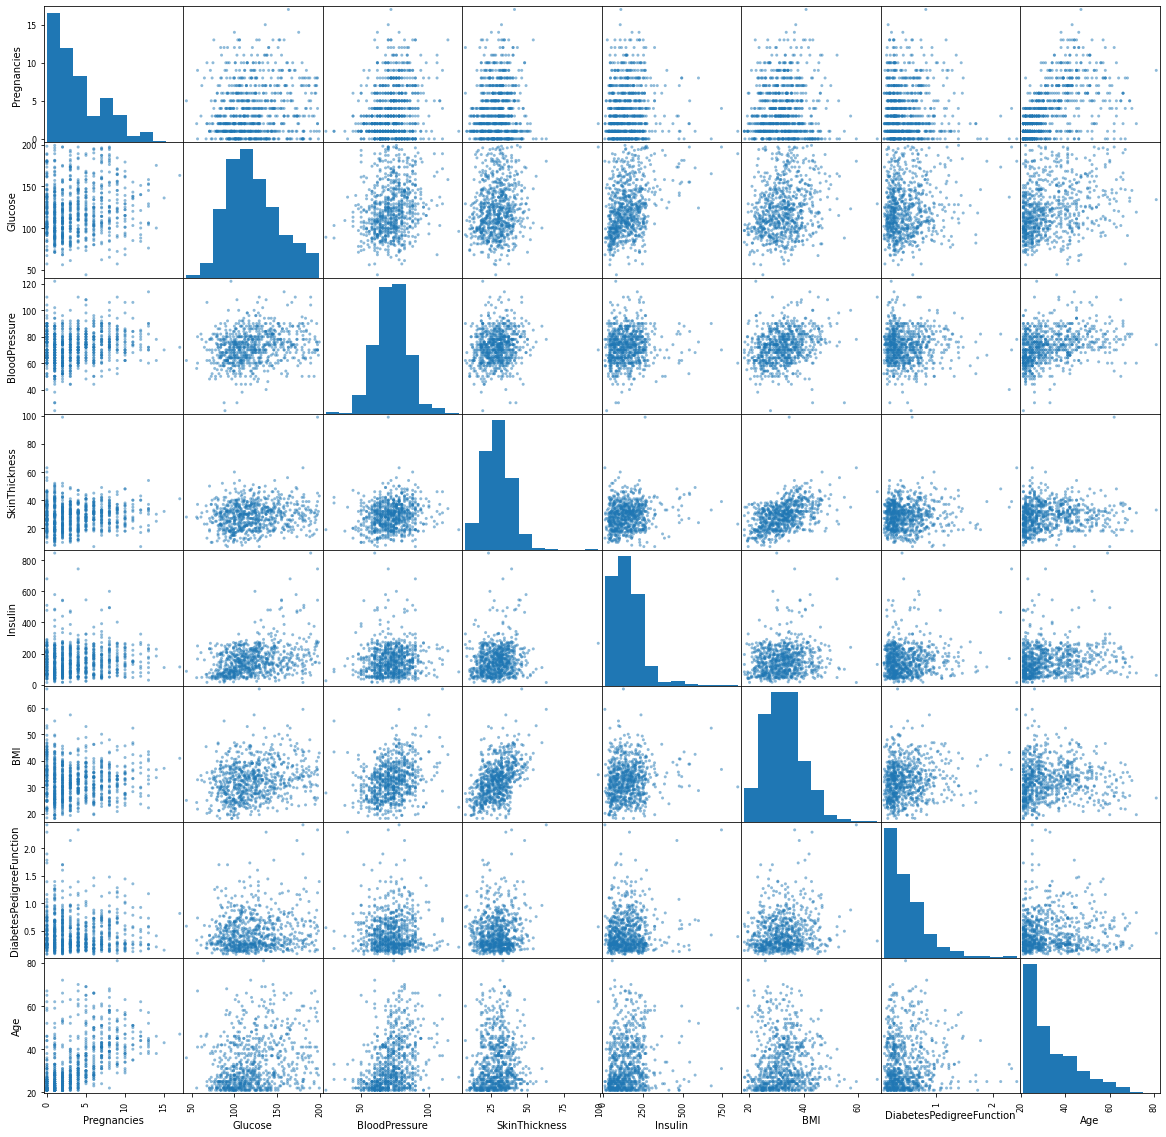

In [26]:
#Prikazujemo korelaciju naših podataka grafički
pd.plotting.scatter_matrix(data_copy.drop(columns=['Outcome']),figsize=(20,20))
plt.show()

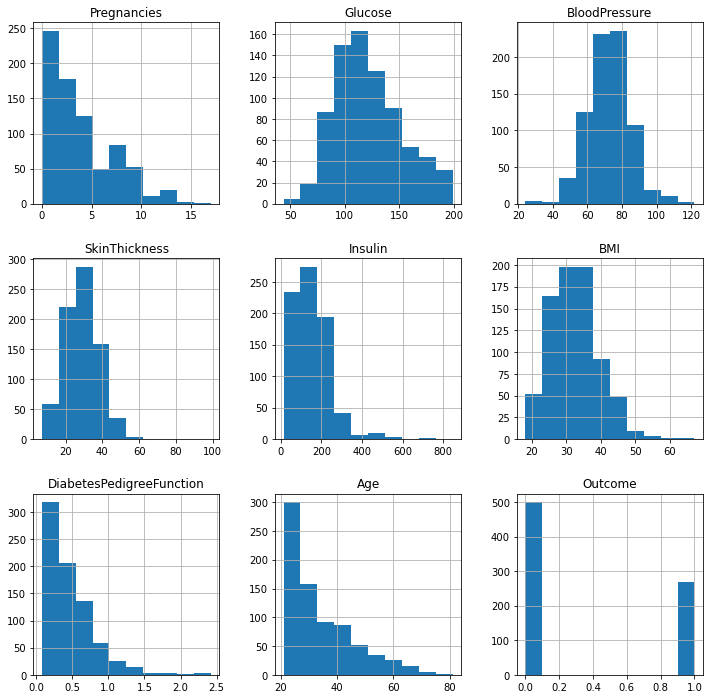

In [27]:
#Prikazujemo histogram podataka i ishoda
data_copy.hist(figsize=(12,12))
plt.show()

In [28]:
#vršimo odvajanje dataseta na set podataka za obučavanje i set za testianje

#NaN
npSkup = data_copy.values
imp = SimpleImputer(missing_values=np.nan, strategy='median')
tfSkup = imp.fit_transform(npSkup)

#Koristicemo originalni dataset koji nema sredjene podatke posto se pokazao kao uspesniji u odlucivanju

X = dataset.drop(columns=['Outcome'],axis=1) #odvajamo podatke od njihovog konačnog ishoda
Y = dataset['Outcome'] #odvajamo konačne ishode od podataka

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [29]:
#dodajemo niz modela koje ćemo testirati

models = []

#Linearna Regresija
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr',max_iter=200)))

#K Nearest Neighbors
models.append(('KNN', KNeighborsClassifier()))

#Naive Bayes
models.append(('NB', GaussianNB()))

#Support Vector Machine
models.append(('SVM', SVC(C=0.5, kernel='linear')))

#Stablo odlučivanja
models.append(('CART', DecisionTreeClassifier()))

#Linear Discriminant Analysis
models.append(('LDA', LinearDiscriminantAnalysis()))


In [30]:
#vršimo obučavanje svih algoritama primenom kros-validacije
#Prikazujemo rezutate obučavanja - prosečnu tačnost i standardnu devijaciju
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.757966 (0.033785)
KNN: 0.698428 (0.037864)
NB: 0.739308 (0.025959)
SVM: 0.765514 (0.040063)
CART: 0.703948 (0.053214)
LDA: 0.767261 (0.037039)


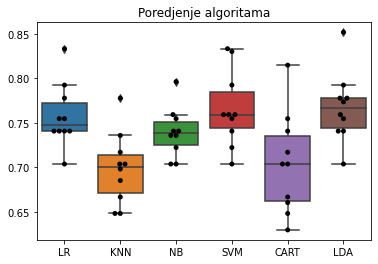

In [35]:
warnings.filterwarnings("ignore")

#Uporedni prikaz algoritama(box) i prikaz prolazaka kroz krosvalidaciju(dots)
ax = sns.boxplot(data=results)
ax = sns.swarmplot(data=results, color = "black")
plt.xticks(np.arange(0,6),names)
plt.title('Poredjenje algoritama')
plt.show()

In [36]:
#U prethodnom mozemo primetiti da su LDA i SVM algoritam priblizno jednaki u uspesnosti ali iz matrica konfuzije
#mozemo zakljuciti da se LDA bolje pokazao u otkrivanju Dijabetesa
#Zbog jednostavnosti algoritma i brzine obucavanja izabracemo LDA algoritam za evaluaciju naseg modela

model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))


              precision    recall  f1-score   support

           0       0.80      0.89      0.84       150
           1       0.74      0.59      0.66        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

[[133  17]
 [ 33  48]]
0.7835497835497836


In [37]:
model = SVC()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))


              precision    recall  f1-score   support

           0       0.78      0.93      0.84       150
           1       0.79      0.51      0.62        81

    accuracy                           0.78       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.78      0.76       231

[[139  11]
 [ 40  41]]
0.7792207792207793
